# ERA5 with DryWet colorbar
u10, v10 and tp

Use of Cartopy because I don't know how to make background with tpoplot

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tpoplot as plot # New plot library (https://tpoplot.readthedocs.io/en/latest/)
# import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import os

In [2]:
# Define zone
latlim=(0,50)
lonlim=(45,120)

period=slice('2019-06','2019-09')

In [3]:
u10 = xr.open_mfdataset(
    '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2019/u10.*.as1e5.GLOBAL_025.nc', combine='by_coords'
).u10.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)
u10.load()

<xarray.DataArray 'u10' (time: 2928, latitude: 201, longitude: 301)>
array([[[ 9.2742920e-02,  2.9196167e-01,  6.0739136e-01, ...,
         -8.7014771e-01, -9.2385864e-01, -9.3753052e-01],
        [-1.2307739e-01,  8.1024170e-02,  3.4664917e-01, ...,
         -1.1181946e+00, -1.0888977e+00, -1.0888977e+00],
        [-5.4690552e-01, -4.7561646e-01, -2.0706177e-01, ...,
         -1.8359680e+00, -1.8056946e+00, -1.5713196e+00],
        ...,
        [ 9.1403198e-01,  1.1171570e+00,  1.2841492e+00, ...,
         -4.2776489e-01, -7.4249268e-02, -3.3792114e-01],
        [ 7.3043823e-01,  9.6969604e-01,  1.1777039e+00, ...,
         -1.7812805e+00, -1.4238586e+00, -1.3935852e+00],
        [ 5.5172729e-01,  8.2321167e-01,  1.0409851e+00, ...,
         -2.0429993e+00, -1.7637024e+00, -1.9619446e+00]],

       [[-9.4146729e-02,  2.5253296e-01,  6.2655640e-01, ...,
         -7.5234985e-01, -6.9180298e-01, -8.6074829e-01],
        [-3.2363892e-01,  6.3079834e-02,  6.6757202e-01, ...,
         -6.7715454e-01, -7.8750610e-01, -9.4863892e-01],
        [-7.7871704e-01, -1.4297485e-01,  4.6542358e-01, ...,
         -1.6615295e+00, -1.7718811e+00, -1.6654358e+00],
        ...,
        [ 7.9061890e-01,  1.1499939e+00,  1.3736267e+00, ...,
         -7.3184204e-01, -4.4375610e-01, -6.4590454e-01],
        [ 5.8847046e-01,  9.9179077e-01,  1.2710876e+00, ...,
         -1.9066467e+00, -1.6488342e+00, -1.6195374e+00],
        [ 3.9218140e-01,  8.3163452e-01,  1.1265564e+00, ...,
         -2.0043030e+00, -1.8236389e+00, -2.1566467e+00]],

       [[-2.8651428e-01,  1.1582947e-01,  4.2930603e-01, ...,
         -7.6405334e-01, -6.2245178e-01, -7.5721741e-01],
        [-4.2323303e-01, -3.3111572e-03,  5.3282166e-01, ...,
         -2.6307678e-01, -5.0721741e-01, -6.6737366e-01],
        [-5.8436584e-01, -8.5342407e-02,  4.5372009e-01, ...,
         -9.9647522e-01, -1.2425690e+00, -1.4535065e+00],
        ...,
        [ 5.3575134e-01,  9.5372009e-01,  1.2349701e+00, ...,
         -7.7870178e-01, -4.0760803e-01, -9.3006897e-01],
        [ 2.9747009e-01,  7.8672791e-01,  1.1421967e+00, ...,
         -1.8402252e+00, -1.4437408e+00, -1.7640533e+00],
        [ 1.0606384e-01,  6.4805603e-01,  1.0142670e+00, ...,
         -1.7367096e+00, -1.6488190e+00, -2.4251862e+00]],

       ...,

       [[-6.6105652e-01, -6.2785339e-01, -5.9855652e-01, ...,
         -1.1522675e+00, -1.2509003e+00, -1.1180878e+00],
        [-7.5090027e-01, -7.2257996e-01, -7.6847839e-01, ...,
         -1.3173065e+00, -1.4579315e+00, -1.3417206e+00],
        [-8.6906433e-01, -8.9347839e-01, -9.4035339e-01, ...,
         -1.2020721e+00, -1.3436737e+00, -1.4100800e+00],
        ...,
        [-4.9969940e+00, -4.7801971e+00, -4.6815643e+00, ...,
          3.5066223e-01,  4.4538879e-01, -3.9152527e-01],
        [-5.0331268e+00, -4.7919159e+00, -4.6551971e+00, ...,
          1.8659973e-01, -1.8547058e-01, -8.7590027e-01],
        [-5.0155487e+00, -4.8309784e+00, -4.6571503e+00, ...,
          2.5202942e-01, -3.7687683e-01, -1.6229706e+00]],

       [[-3.1007385e-01, -3.1105042e-01, -3.1788635e-01, ...,
         -8.4718323e-01, -9.7901917e-01, -8.5206604e-01],
        [-4.0870667e-01, -4.1456604e-01, -5.0148010e-01, ...,
         -1.0073395e+00, -1.1997223e+00, -1.0942535e+00],
        [-5.0148010e-01, -5.8351135e-01, -6.7140198e-01, ...,
         -8.8429260e-01, -1.0776520e+00, -1.1977692e+00],
        ...,
        [-4.5981598e+00, -4.4165192e+00, -4.2407379e+00, ...,
         -1.0206604e-01,  9.4223022e-02, -6.0206604e-01],
        [-4.6801910e+00, -4.4389801e+00, -4.1743317e+00, ...,
         -6.5675354e-01, -7.0655823e-01, -1.2319489e+00],
        [-4.6948395e+00, -4.4321442e+00, -4.1391754e+00, ...,
         -1.0131989e+00, -1.1147614e+00, -2.2378082e+00]],

       [[-5.8871460e-01, -6.0824585e-01, -6.0140991e-01, ...,
         -8.0160522e-01, -9.8715210e-01, -9.3344116e-01],
        [-6.5023804e-01, -6.7855835e-01, -8.0551147e-01, ...,
         -1.0184021e+00, -1.2830505e+00, -1.2547302e+00],
   

In [4]:
v10 = xr.open_mfdataset(
    '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2019/v10.*.as1e5.GLOBAL_025.nc', combine='by_coords'
).v10.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)
v10.load()

<xarray.DataArray 'v10' (time: 2928, latitude: 201, longitude: 301)>
array([[[-2.1620789 , -1.9550476 , -1.8593445 , ...,  0.8545227 ,
          1.0176086 ,  0.92678833],
        [-2.1698914 , -2.007782  , -1.6239929 , ...,  1.7031555 ,
          1.4941711 ,  1.3730774 ],
        [-2.0732117 , -2.3027039 , -1.9169617 , ...,  1.7060852 ,
          1.4971008 ,  1.1894836 ],
        ...,
        [ 8.400421  ,  8.411163  ,  8.491241  , ...,  3.4971008 ,
          2.9951477 ,  1.6660461 ],
        [ 8.215851  ,  8.277374  ,  8.394562  , ...,  3.1972961 ,
          2.5195618 ,  1.226593  ],
        [ 8.055695  ,  8.207062  ,  8.297882  , ...,  2.0898743 ,
          1.4814758 ,  0.9951477 ]],

       [[-2.1108093 , -1.8237    , -1.7778015 , ...,  0.3003235 ,
          0.59329224,  0.75442505],
        [-2.2397156 , -2.0004578 , -1.683075  , ...,  1.1880188 ,
          1.3149719 ,  1.4595032 ],
        [-2.3246765 , -2.330536  , -2.0121765 , ...,  1.730011  ,
          1.8569641 ,  1.8061829 ],
        ...,
        [ 8.421417  ,  8.478058  ,  8.625519  , ...,  3.2954407 ,
          2.495636  ,  1.448761  ],
        [ 8.181183  ,  8.283722  ,  8.4409485 , ...,  2.6968079 ,
          2.018097  ,  0.9204407 ],
        [ 7.9634094 ,  8.156769  ,  8.299347  , ...,  1.8179016 ,
          1.2134094 ,  0.44973755]],

       [[-1.6885376 , -1.6377563 , -1.631897  , ..., -0.8936157 ,
         -0.4824829 ,  0.24603271],
        [-1.5996704 , -1.5371704 , -1.3897095 , ..., -0.27838135,
          0.25482178,  0.95892334],
        [-1.5059204 , -1.5606079 , -1.4111938 , ...,  0.5223999 ,
          1.0585327 ,  1.2128296 ],
        ...,
        [ 8.444275  ,  8.526306  ,  8.723572  , ...,  2.7147827 ,
          1.7665405 ,  1.2206421 ],
        [ 8.273376  ,  8.384705  ,  8.566345  , ...,  1.937439  ,
          1.4081421 ,  0.6288452 ],
        [ 8.063416  ,  8.245056  ,  8.410095  , ...,  1.0526733 ,
          0.63861084, -0.48736572]],

       ...,

       [[ 5.7002563 ,  5.5371704 ,  5.5342407 , ...,  3.4238892 ,
          3.1426392 ,  2.7920532 ],
        [ 5.792053  ,  5.6279907 ,  5.4873657 , ...,  3.522522  ,
          3.1572876 ,  2.779358  ],
        [ 5.8496704 ,  5.710022  ,  5.5684204 , ...,  3.2080688 ,
          2.8408813 ,  2.3076782 ],
        ...,
        [ 2.5029907 ,  2.4317017 ,  2.4385376 , ...,  3.5322876 ,
          3.2578735 ,  1.7442017 ],
        [ 2.2285767 ,  2.180725  ,  2.210022  , ...,  3.0234985 ,
          2.5195923 ,  1.2246704 ],
        [ 1.968811  ,  2.0332642 ,  2.0645142 , ...,  2.0674438 ,
          1.4678345 ,  1.1201782 ]],

       [[ 5.4849854 ,  5.329712  ,  5.4176025 , ...,  3.6011963 ,
          3.3638916 ,  3.0113525 ],
        [ 5.588501  ,  5.4283447 ,  5.295532  , ...,  3.7115479 ,
          3.3668213 ,  2.9927979 ],
        [ 5.604126  ,  5.477173  ,  5.3443604 , ...,  3.3463135 ,
          2.9996338 ,  2.4820557 ],
        ...,
        [ 1.7506104 ,  1.7037354 ,  1.7008057 , ...,  2.9898682 ,
          2.78479   ,  1.4263916 ],
        [ 1.4752197 ,  1.4234619 ,  1.4058838 , ...,  2.4312744 ,
          2.0699463 ,  0.8775635 ],
        [ 1.1939697 ,  1.1744385 ,  1.1480713 , ...,  1.4342041 ,
          1.041626  ,  0.84436035]],

       [[ 5.291458  ,  5.1605988 ,  5.2484894 , ...,  3.7719269 ,
          3.6762238 ,  3.296341  ],
        [ 5.3803253 ,  5.247513  ,  5.157669  , ...,  4.0121613 ,
          3.633255  ,  3.2289581 ],
        [ 5.3910675 ,  5.3090363 ,  5.218216  , ...,  3.7328644 ,
          3.3529816 ,  2.8041534 ],
        ...,
        [ 1.64888   ,  1.6498566 ,  1.6732941 , ...,  3.0111847 ,
          2.6234894 ,  1.3764191 ],
        [ 1.5414581 ,  1.5072784 ,  1.4711456 , ...,  2.2162628 ,
          1.9721222 ,  0.82759094],
        [ 1.352005  ,  1.3256378 ,  1.2660675 , ...,  0.9877472 ,
          0.8441925 ,  0.53852844]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 0.75 0.5 0.25 0.0
  * longitude  (longitude) float32 45.0 45.25 45.5

In [5]:
tp = xr.open_mfdataset(
    '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/FC_SF/2019/*/tp.*.1800.fs1e5.GLOBAL_025.nc', combine='by_coords'
).tp.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)

with xr.set_options(keep_attrs=True):
    tp = tp * 1e3
    tp.attrs['units'] = 'mm'

tp.load()

<xarray.DataArray 'tp' (time: 2196, latitude: 201, longitude: 301)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.11851501e-01, 3.64780426e-01, 3.73363495e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.78539276e-01, 6.76631927e-01, 6.69956207e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.97271729e-01, 7.95364380e-01, 8.46385956e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.95639038e-02, 5.76972961e-02, 8.48770142e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.91006470e-02, 8.10623169e-02, 1.04427338e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.96046448e-02, 2.14576721e-01, 3.30448151e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.46389008e-01, 2.11238861e-01, 3.26633453e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.03745270e-01, 3.49044800e-01, 4.50611115e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.45842743e-01, 4.91142273e-01, 5.82218170e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.48091125e-02, 4.29153442e-02, 1.49726868e-01],
        [0.00000000e+00, 0.00000000e+00, 4.76837158e-04, ...,
         7.62939453e-03, 1.28746033e-02, 4.40597534e-01],
        [0.00000000e+00, 0.00000000e+00, 9.53674316e-04, ...,
         6.67572021e-03, 4.19616699e-02, 3.01361084e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.16825104e-01, 2.93254852e-01, 3.65734100e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.76837158e-02, 7.34329224e-02, 1.36852264e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.57968903e-01, 2.83718109e-01, 4.51564789e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.28746033e-02, 2.86102295e-03, 4.28199768e-01],
        [0.00000000e+00, 0.00000000e+00, 9.53674316e-04, ...,
         3.81469727e-03, 5.24520874e-03, 2.98500061e-01],
        [0.00000000e+00, 0.00000000e+00, 2.38418579e-03, ...,
         2.86102295e-03, 1.81198120e-02, 1.49250031e-01]],

       ...,

       [[9.53674316e-04, 9.53674316e-04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.76290894e-01, 1.80721283e-01, 6.05583191e-02],
        [0.00000000e+00, 4.76837158e-04, 0.00000000e+00, ...,
         5.81264496e-01, 1.24931335e-01, 8.58306885e-03],
        [0.00000000e+00, 4.76837158e-04, 0.00000000e+00, ...,
         3.52382660e-01, 1.81198120e-02, 1.00612640e-01]],

       [[5.72204590e-03, 3.81469727e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.86102295e-03, 9.53674316e-04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.43051147e-03, 9.53674316e-04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.60217285e+00, 7.57217407e-01, 4.94956970e-01],
        [0.00000000e+00, 0.00000000e+00, 9.53674316e-04, ...,
         1.28555298e+00, 4.28199768e-01, 2.84194946e-01],
        [0.00000000e+00, 0.00000000e+00, 9.53674316e-04, ...,
         6.82353973e-01, 2.70843506e-01, 3.90529633e-01]],

       [[9.53674316e-03, 6.67572021e-03, 1.90734863e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.76837158e-03, 9.53674316e-04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    

# --> Make a personnalyzed colormap ??

- https://unidata.github.io/python-gallery/examples/Precipitation_Map.html
- http://jjhelmus.github.io/blog/2013/09/17/plotting-nsw-precipitation-data/

Voir vidéo : https://www.youtube.com/watch?v=ILNC7IdyWVU -> https://svs.gsfc.nasa.gov/cgi-bin/details.cgi?aid=4285

In [6]:
import matplotlib.colors as mcolors

# draw filled contours.
clevs = [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10, 20, 50]

# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [
    ( 84/255,   48/255,    5/255),
    (140/255,   81/255,   10/255),
    (191/255,  129/255,   45/255),
    (223/255,  194/255,  125/255),
    (246/255,  232/255,  195/255),
    (245/255,  245/255,  245/255),
    (199/255,  234/255,  229/255),
    (128/255,  205/255,  193/255),
    ( 53/255,  151/255,  143/255),
    (  1/255,  102/255,   95/255),
    (  0/255,   60/255,   48/255)   
]

cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
cmap.set_over(( 0/255,   33/255,    27/255))
cmap.set_under(( 0,   0,   0, 0))

norm = mcolors.BoundaryNorm(clevs, cmap.N)

# cs = ax.contourf(x, y, data, clevs, cmap=cmap, norm=norm)

In [7]:
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/data/mlalande/PYTHON/cartopy/BG"

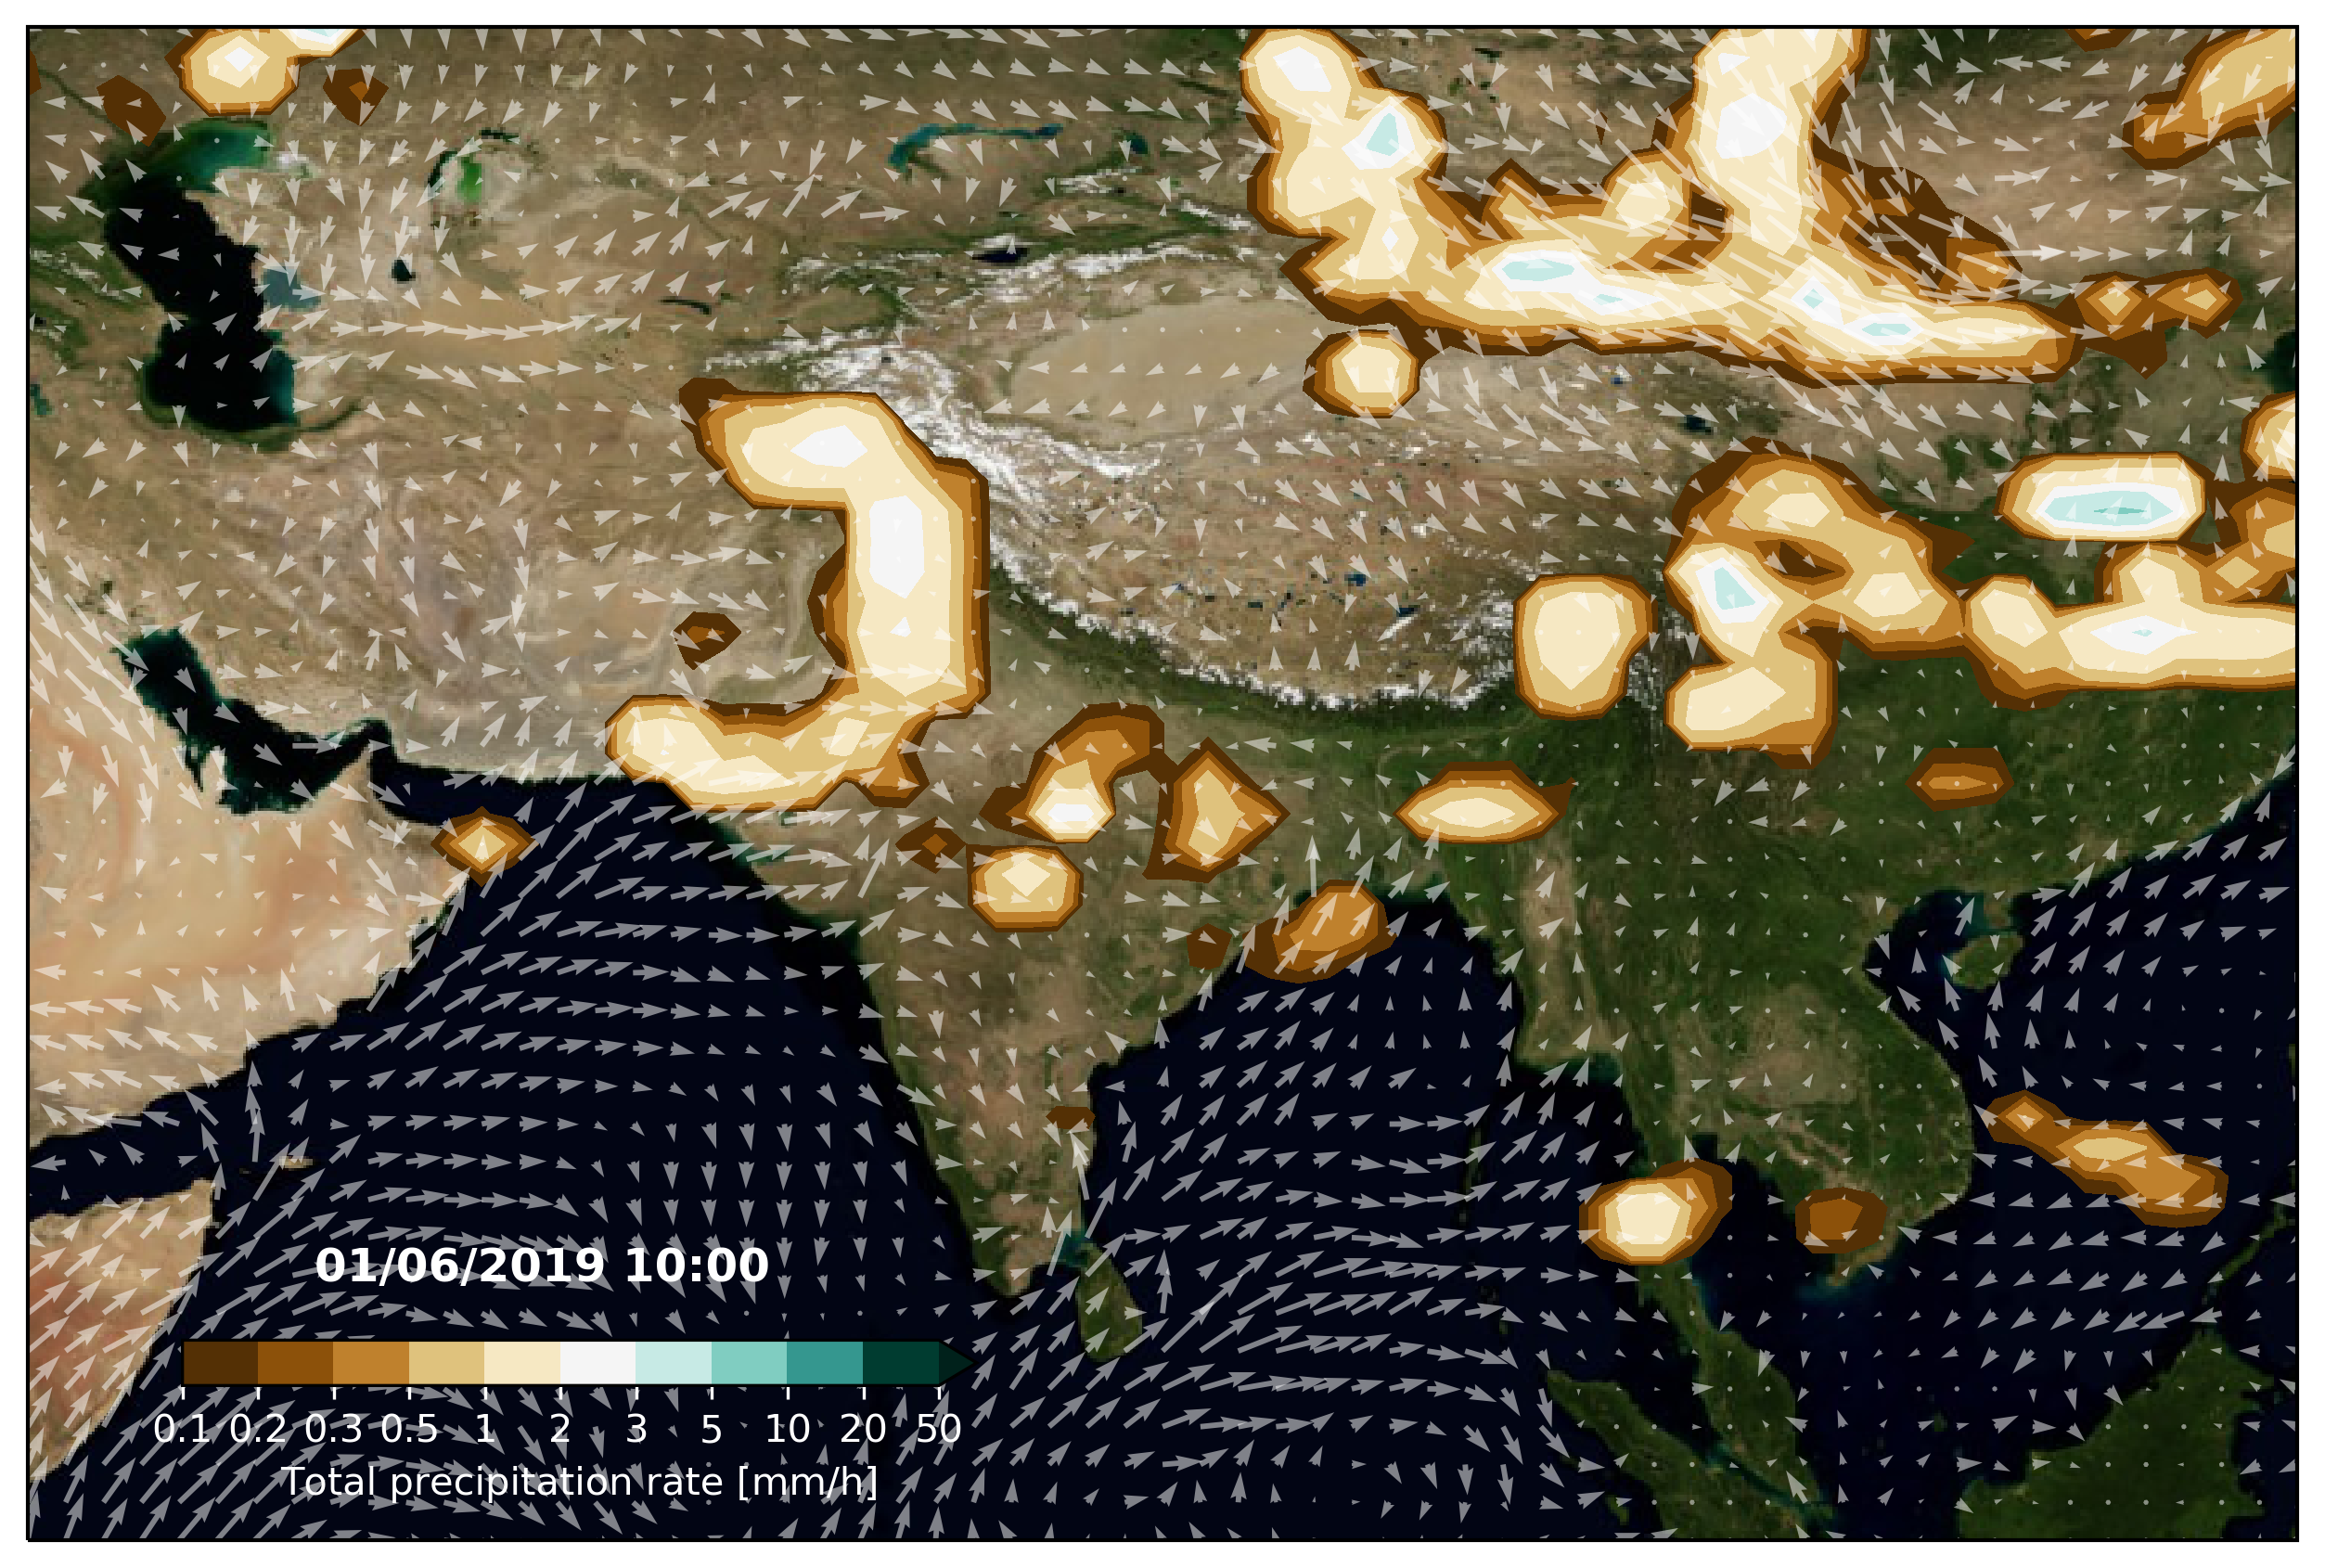

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i = 10

# To make white text
# https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
background = 0
if background == 0:
    back_color='black'
    fore_color='white'
else:
    back_color='white'
    fore_color='black'

plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color


dpi = 300
# dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
# ax.stock_img()
ax.background_img(name='BM', resolution='high')


# Add the tpecip
# tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
m = ax.contourf(tp[i], levels=clevs, cmap=cmap, norm=norm, extend='max')

# Add the winds
k = 5 # don't take all
ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

# Put the colorbar inside the figure
# https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
cbaxes = inset_axes(ax, width="35%", height="3%", loc="lower left", borderpad=4) 
cbar = fig.colorbar(m, cax=cbaxes, ticks=clevs, orientation='horizontal', label="Total precipitation rate [mm/h]")
cbar.ax.set_xticklabels(clevs)

# Add the date
ax.text(62, 9, str(tp[i].time.dt.strftime('%d/%m/%Y %H:%M').values), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold'
        )

# plt.savefig('test.png', dpi=dpi, bbox_inches='tight')

plt.show()

## Save images
Try to save without displaying image: 
https://stackoverflow.com/questions/15713279/calling-pylab-savefig-without-display-in-ipython

Not the first solution but the second

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

for i in range(0,91):
    print(i)
    # To make white text
    # https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
    background = 0
    if background == 0:
        back_color='black'
        fore_color='white'
    else:
        back_color='white'
        fore_color='black'

    plt.rcParams["text.color"] = fore_color
    plt.rcParams["axes.labelcolor"] = fore_color
    plt.rcParams["xtick.color"] =  fore_color
    plt.rcParams["ytick.color"] = fore_color


    dpi = 300
    # dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
#     fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
    fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

    # Add background image
    # ax.stock_img()
    ax.background_img(name='BM', resolution='high')


    # Add the tpecip
    # tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
    m = ax.contourf(tp[i], levels=clevs, cmap=cmap, norm=norm, extend='max')

    # Add the winds
    k = 5 # don't take all
    ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

    # Put the colorbar inside the figure
    # https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
    cbaxes = inset_axes(ax, width="35%", height="3%", loc="lower left", borderpad=4) 
    cbar = fig.colorbar(m, cax=cbaxes, ticks=clevs, orientation='horizontal', label="Total precipitation rate [mm/h]")
    cbar.ax.set_xticklabels(clevs)

    # Add the date
    ax.text(62, 9, str(tp[i].time.dt.strftime('%d/%m/%Y %H:%M').values), 
             horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold'
            )

    plt.savefig('img/ERA5_DryWet/IMG_'+str(i).zfill(4)+'.png', dpi=dpi, bbox_inches='tight')

    plt.close(fig)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


## Make video
https://stackoverflow.com/questions/22965569/convert-from-jpg-to-mp4-by-ffmpeg

I didn't succed with FuncAnimation from matplotlib :https://courspython.com/animation-matplotlib.html

For slowing down: https://trac.ffmpeg.org/wiki/How%20to%20speed%20up%20/%20slow%20down%20a%20video

In [13]:
ffmpeg -f image2 -i img/ERA5_DryWet/IMG_%4d.png -filter:v "setpts=2.0*PTS" ERA5_DryWet_animation.mp4

/bin/sh: ffmpeg : commande introuvable
